In [1]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.52253952 0.35713845 0.01050599 ... 0.45920441 0.0589746  0.17102842]
 [0.6948301  0.47489335 0.01397001 ... 0.61061228 0.07841957 0.22741953]
 [0.33244552 0.2272155  0.00668403 ... 0.29215102 0.0375203  0.1088102 ]
 ...
 [0.09808148 0.06703544 0.00197199 ... 0.08619338 0.01106962 0.0321023 ]
 [0.5834098  0.39874127 0.01172983 ... 0.51269683 0.06584451 0.1909514 ]
 [0.19739272 0.13491139 0.00396871 ... 0.17346747 0.02227804 0.0646071 ]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.7078657   0.29757961 -0.06348552 ...  0.42261827 -0.00779668
   0.21330687]
 [ 0.73413191  0.52192828  0.04946934 ...  0.64587509 -0.09407578
   0.14019558]
 [ 0.17319968  0.10660348  0.24201375 ...  0.21841105  0.137156
   0.12462476]
 ...
 [ 0.22587447  0.0846573   0.00983533 ...  0.15523072 -0.115966
   0.02340132]
 [ 0.73879006  0.4964425   0.05497495 ...  0.35017665  0.05901258
   0.15736908]
 [ 0.23644696  0.0993141   0.11451282 ...  0.20485967 -0.14298451
  -0.018529

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix)
K=5

[IterativeSVD] Iter 1: observed MAE=0.076875
[IterativeSVD] Iter 2: observed MAE=0.073273
[IterativeSVD] Iter 3: observed MAE=0.066934
[IterativeSVD] Iter 4: observed MAE=0.056086
[IterativeSVD] Iter 5: observed MAE=0.050946
[IterativeSVD] Iter 6: observed MAE=0.050940
[IterativeSVD] Iter 7: observed MAE=0.050935
[IterativeSVD] Iter 8: observed MAE=0.050932
[IterativeSVD] Iter 9: observed MAE=0.050930
[IterativeSVD] Iter 10: observed MAE=0.050928
[IterativeSVD] Iter 11: observed MAE=0.050928
[IterativeSVD] Iter 12: observed MAE=0.050927
[IterativeSVD] Iter 13: observed MAE=0.050927


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.076875
[IterativeSVD] Iter 2: observed MAE=0.073273
[IterativeSVD] Iter 3: observed MAE=0.066934
[IterativeSVD] Iter 4: observed MAE=0.056086
[IterativeSVD] Iter 5: observed MAE=0.050946
[IterativeSVD] Iter 6: observed MAE=0.050940
[IterativeSVD] Iter 7: observed MAE=0.050935
[IterativeSVD] Iter 8: observed MAE=0.050932
[IterativeSVD] Iter 9: observed MAE=0.050930
[IterativeSVD] Iter 10: observed MAE=0.050928
[IterativeSVD] Iter 11: observed MAE=0.050928
[IterativeSVD] Iter 12: observed MAE=0.050927
[IterativeSVD] Iter 13: observed MAE=0.050927
[-0.10802244  0.0504946  -0.27260335  0.18301746 -0.01551855 -0.23285453
  0.0118904   0.0920824   0.07832245  0.05771188 -0.28754386 -0.19255808
 -0.04665996 -0.12744623  0.3894066   0.00744438 -0.17863872 -0.07189157
  0.15627832  0.23658068 -0.02702583 -0.17266501  0.22838231  0.07620068
 -0.02588652  0.15208103  0.0932809

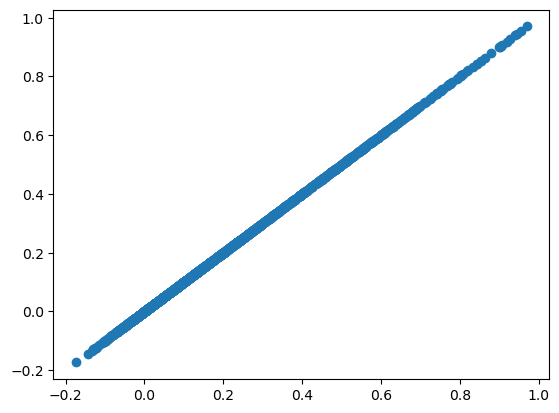

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

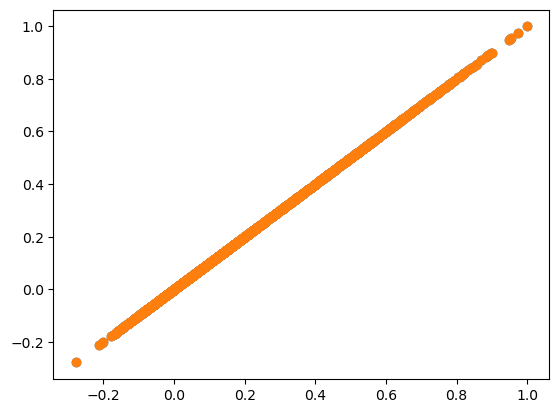

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[154.36126374, 154.36126374, 154.36126374, ..., 154.36126374,
        154.36126374, 154.36126374],
       [154.36126374, 154.36126374, 154.36126374, ..., 154.36126374,
        154.36126374, 154.36126374],
       [154.36126374, 154.36126374, 154.36126374, ..., 154.36126374,
        154.36126374, 154.36126374],
       ...,
       [154.36126374, 154.36126374, 154.36126374, ..., 154.36126374,
        154.36126374, 154.36126374],
       [154.36126374, 154.36126374, 154.36126374, ..., 154.36126374,
        154.36126374, 154.36126374],
       [154.36126374, 154.36126374, 154.36126374, ..., 154.36126374,
        154.36126374, 154.36126374]])

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

(50, 22)
(40, 22)


(50, 22)
(40, 22)
(50, 16)
(40, 16)
(50, 16)
(40, 16)
(50, 16)
(40, 16)
(50, 15)
(40, 15)


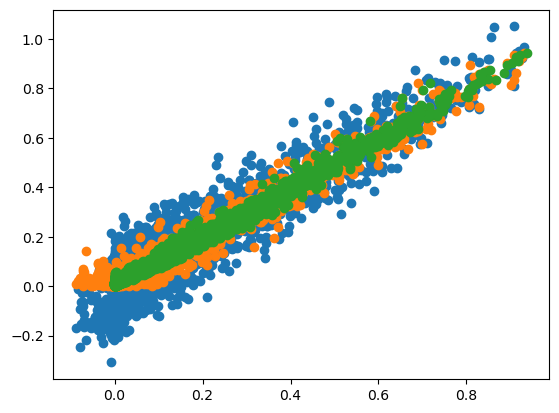

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

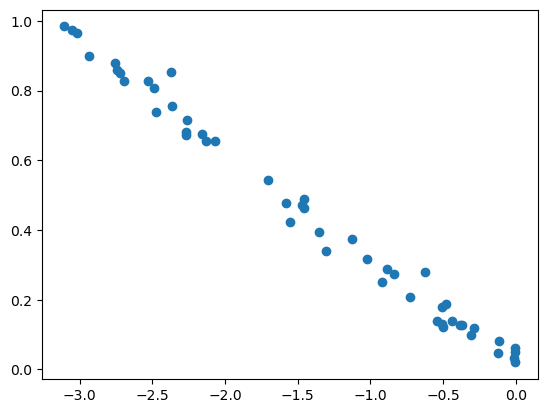

In [11]:
plt.scatter(mycebmf.L[:,0], u)

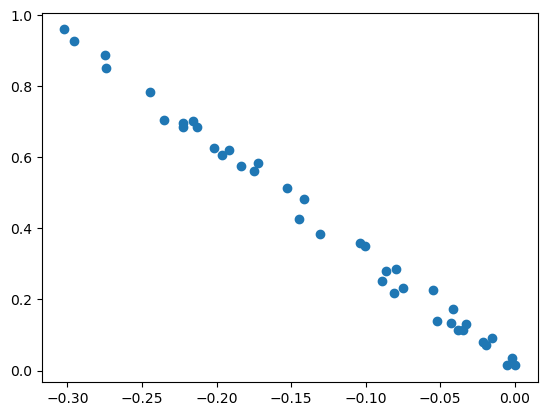

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
mycebmf.kl_l

array([ 0, 18, 20, 21, 16])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

(50, 15)
(40, 15)


In [16]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

43.86769669680106